# Task - Business Optimization Using Linear Programming

In this task, we solve a business decision-making problem using **Linear Programming (LP)** and Python's **PuLP** library.

The goal is to **maximize profit** for a company that manufactures two products – **Product A** and **Product B** – under given constraints like **labor hours** and **material usage**.


**Optimization Problem:** A factory produces two products, A and B.
Each product uses time and materials.
You must maximize total profit without exceeding available time and materials.

# Problem Formulation:

A factory produces two products: **Product A and Product B**.
Each unit of Product A gives a profit of **$20** and requires:

* 4 hours of labor
* 3 units of raw material

Each unit of Product B gives a profit of $30 and requires:

* 6 hours of labor
* 4 units of raw material

The factory has:

* 60 hours of labor
* 40 units of raw material

## Objective Function

Decide how many units of each product to produce to **maximize profit**, without exceeding available labor and material.

Let:
- A = number of units of Product A
- B = number of units of Product B

Maximize:
**Profit = 20A + 30B**


## Constraints

1. **Labor Constraint**: 4A + 6B ≤ 60

2. **Material Constraint**: 3A + 4B ≤ 40

3. **Non-Negativity Constraint**:  A ≥ 0, B ≥ 0 (only positive quantities allowed)




In [2]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.0 MB/s eta 0:00:00


In [ ]:
# Import PuLP
from pulp import *

# Create the LP maximization problem
model = LpProblem("Maximize_Profit", LpMaximize)

# Define decision variables (Product A and B)
A = LpVariable("Product_A", lowBound=0, cat='Integer')
B = LpVariable("Product_B", lowBound=0, cat='Integer')

# Objective function: Maximize profit
model += 20 * A + 30 * B, "Total_Profit"

# Constraints
model += 4 * A + 6 * B <= 60, "Labor_Time"
model += 3 * A + 4 * B <= 40, "Material_Usage"

# Solve the model
model.solve()

# Output the results
print("Status:", LpStatus[model.status])
print("Produce", A.varValue, "units of Product A")
print("Produce", B.varValue, "units of Product B")
print("Total Maximum Profit = $", value(model.objective))


Status: Optimal
Produce 0.0 units of Product A
Produce 10.0 units of Product B
Total Maximum Profit = $ 300.0


## Final Result with Output

Based on the optimal solution:

- Produce **0 units of Product A**
- Produce **10 units of Product B**
- Maximum Profit = **$300**

 All constraints are satisfied and profit is maximized under available resources.

## Feasible Region & Optimal Solution (Graph)

The graph below shows the feasible region formed by the constraints and highlights the optimal solution point that gives the maximum profit.

Plotting the Graph using Matplotlib

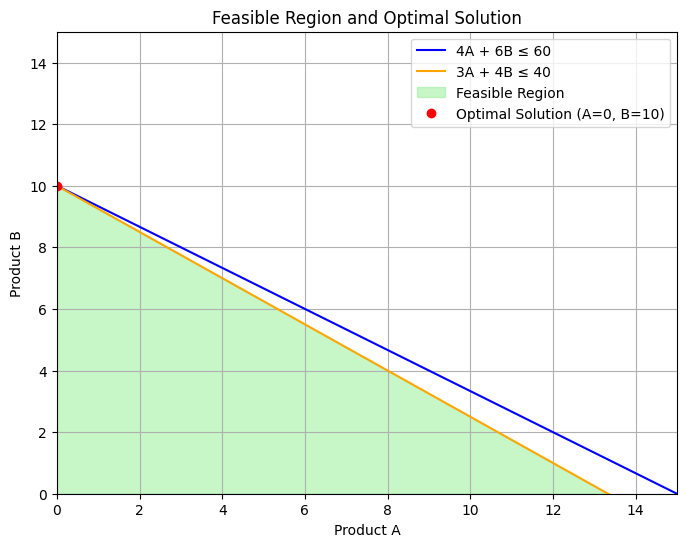

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define range for A values
A_vals = np.linspace(0, 20, 200)

# Constraint lines:
B1 = (60 - 4 * A_vals) / 6  # From 4A + 6B <= 60
B2 = (40 - 3 * A_vals) / 4  # From 3A + 4B <= 40

# Setup plot
plt.figure(figsize=(8,6))

# Plot constraint lines
plt.plot(A_vals, B1, label=r'4A + 6B ≤ 60', color='blue')
plt.plot(A_vals, B2, label=r'3A + 4B ≤ 40', color='orange')

# Fill feasible region
B = np.minimum(B1, B2)
plt.fill_between(A_vals, 0, B, where=(B>=0), color='lightgreen', alpha=0.5, label='Feasible Region')

# Plot optimal solution
plt.plot(0, 10, 'ro', label='Optimal Solution (A=0, B=10)')

# Labels and aesthetics
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel('Product A')
plt.ylabel('Product B')
plt.title('Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

Using Linear Programming and the PuLP library in Python, we were able to find the **optimal production strategy** to maximize profit under limited resources.

This approach can be applied to various business scenarios such as manufacturing, resource allocation, and planning to make **data-driven decisions** efficiently.